<a href="https://colab.research.google.com/github/shebbir007/Python_Learning_Basics/blob/main/Copy_of_Class06MatplotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Libraries

In [ ]:
#install packages
!pip install numpy pandas matplotlib seaborn
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Uploading

In [ ]:
from google.colab import drive
import warnings
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Mounted at /content/drive


#Data Set Input

In [ ]:
students=pd.read_csv('/content/drive/MyDrive/datasets/StudentsPerformance.csv')

# Data checking


In [ ]:
print(students.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
print(students.shape)

(1000, 8)


In [ ]:
print(students.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [ ]:
print(students.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [ ]:
print(students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


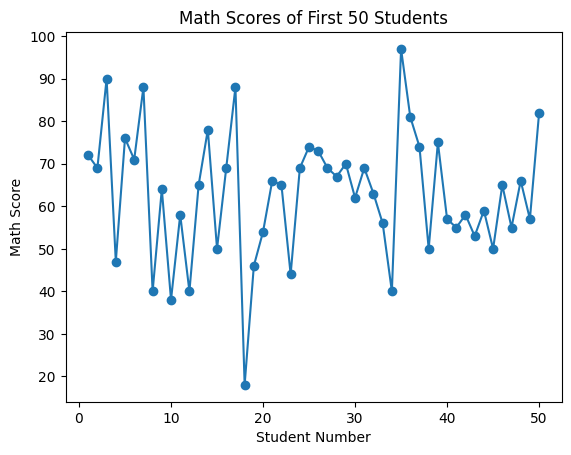

In [ ]:
import matplotlib.pyplot as plt
#Simple line plot: First 10 math scores
x = range(1,51) #Y-axis
math_scores = students['math score'].head(50) # Define math_scores from the DataFrame
plt.plot(x,math_scores,marker='o')
plt.title('Math Scores of First 50 Students')
# Title
plt.xlabel('Student Number')
# X label
plt.ylabel('Math Score')
# Y label
plt.show() # Show plot

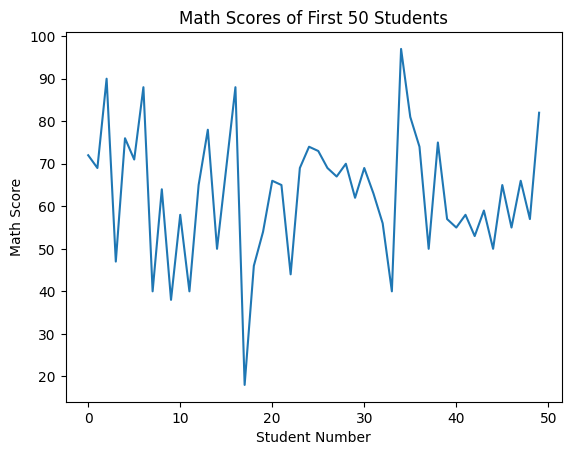

In [ ]:
import matplotlib.pyplot as plt
#Simple line plot: First 10 math scores
plt.plot(students['math score'].head(50))
plt.title('Math Scores of First 50 Students')
# Title
plt.xlabel('Student Number')
# X label
plt.ylabel('Math Score')
# Y label
plt.show() # Show plot

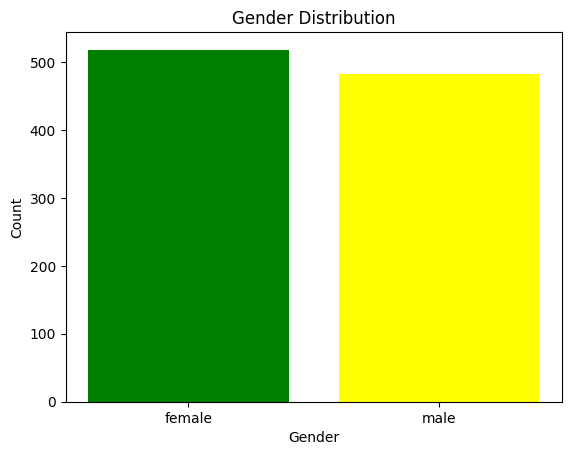

In [ ]:
gender_counts = students['gender'].value_counts()
# Bar plot
plt.bar(gender_counts.index, gender_counts.values, color=['green', 'yellow'])
plt.title("Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

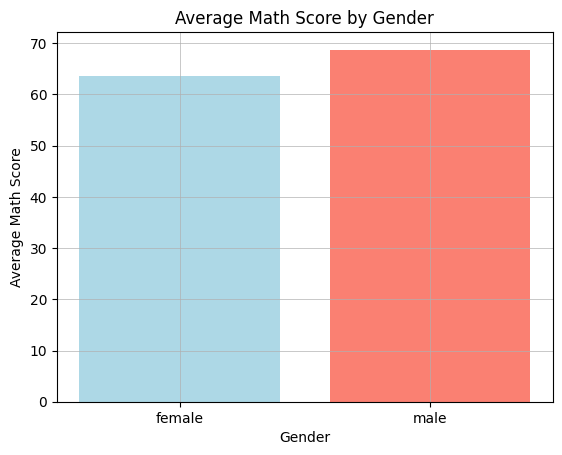

In [ ]:
#Group by gender, average math score
avg_math = students.groupby('gender')['math score'].mean()
# Bar plot
plt.grid(True, which="both", linestyle="-", linewidth=0.7, alpha=0.7)
plt.bar(avg_math.index, avg_math.values, color=['lightblue', 'salmon'])
plt.title("Average Math Score by Gender")
plt.xlabel('Gender')
plt.ylabel('Average Math Score')
plt.show()

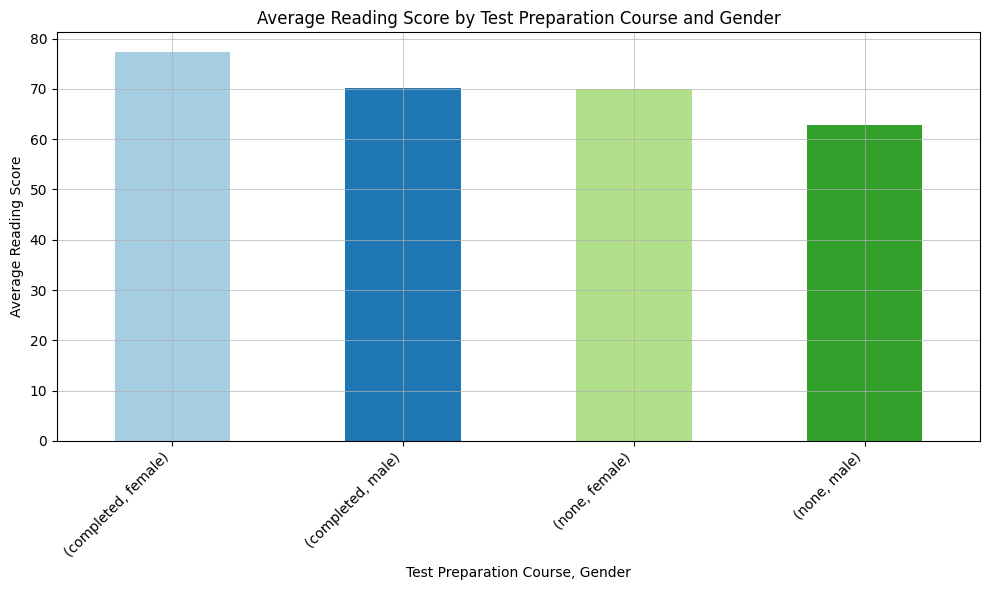

In [ ]:
avg_reading = students.groupby(['test preparation course', 'gender'])['reading score'].mean()
# Bar plot
plt.figure(figsize=(10, 6))
avg_reading.plot(kind='bar', color=plt.cm.Paired(np.arange(len(avg_reading))))
plt.grid(True, which="both", linestyle="-", linewidth=0.7, alpha=0.7)
plt.title("Average Reading Score by Test Preparation Course and Gender")
plt.xlabel('Test Preparation Course, Gender')
plt.ylabel('Average Reading Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

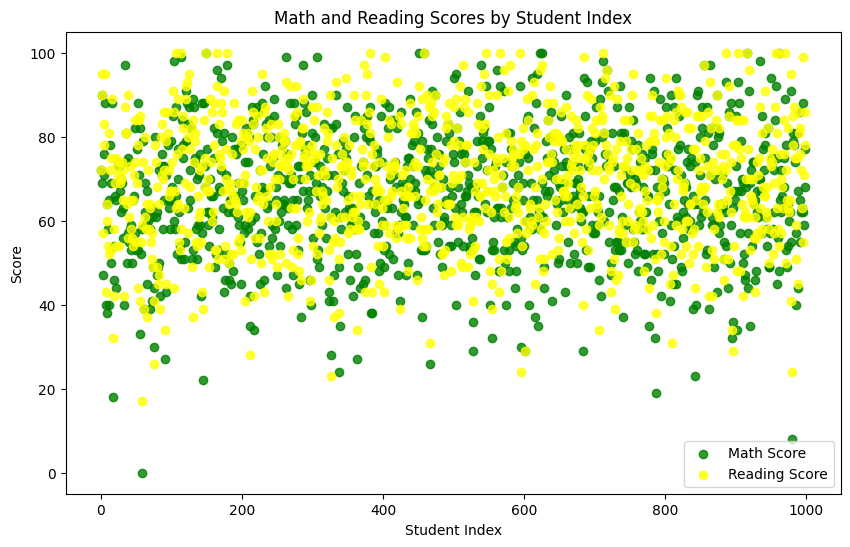

In [ ]:
# Math and Reading Scores by Student Index
sample=students.head(100)
plt.figure(figsize=(10, 6))
plt.scatter(students.index, students['math score'] , color='green', label='Math Score', alpha=0.8)
plt.scatter(students.index, students['reading score'] , color='yellow', label='Reading Score', alpha=0.8)
#plt.grid(True)
plt.xlabel('Student Index')
plt.ylabel('Score')
plt.title('Math and Reading Scores by Student Index')
plt.legend()
plt.show()

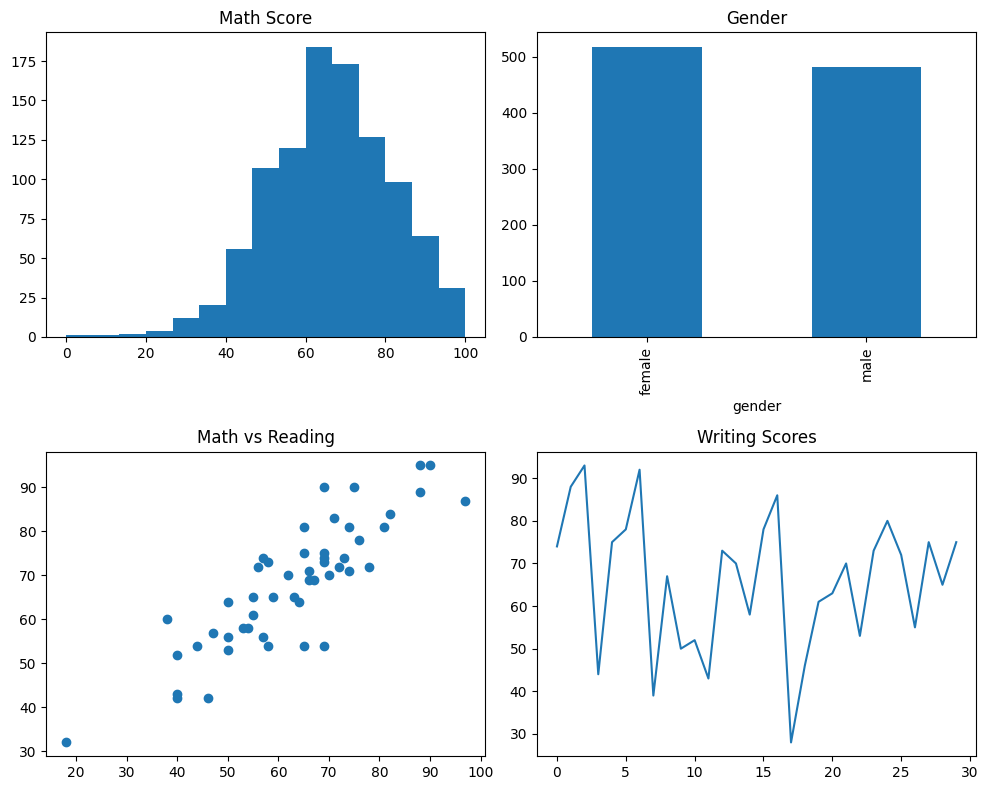

In [ ]:
fig, axes = plt.subplots (2, 2, figsize=(10, 8))
#Plot 1: Histogram
axes[0, 0].hist(students['math score'], bins=15)
axes[0, 0].set_title('Math Score')
#Plot 2: Bar chart
students['gender'].value_counts().plot(kind='bar', ax=axes [0, 1])
axes [0, 1].set_title('Gender')
#Plot 3: Scatter
axes[1, 0].scatter (students['math score'][:50], students['reading score'][:50])
axes[1, 0].set_title('Math vs Reading')
#Plot 4: Line
axes[1, 1].plot(students['writing score'] [:30])
axes[1, 1].set_title('Writing Scores')
plt.tight_layout()
plt.show()

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


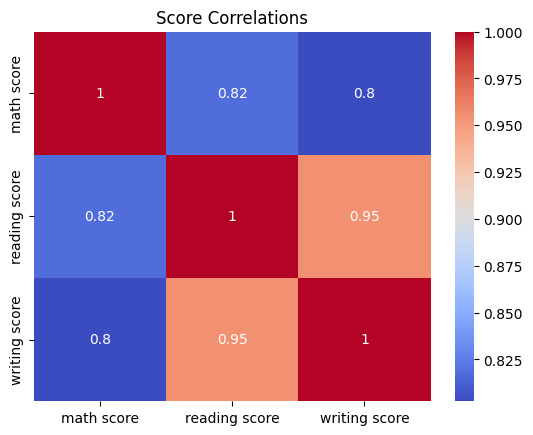

In [ ]:
#Correlation between scores
scores = students [['math score', 'reading score', 'writing score']]
correlation = scores.corr()
print(correlation)

#Simple heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Score Correlations')
plt.show()